<a href="https://colab.research.google.com/github/saminehbagheri/AugmentedRBF-F10/blob/master/ModelingF10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
! git clone https://github.com/saminehbagheri/AugmentedRBF-F10.git
%cd AugmentedRBF-F10 
%run RBF_for_Ellipsoidal.ipynb

Cloning into 'AugmentedRBF-F10'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.
/content/AugmentedRBF-F10/AugmentedRBF-F10/AugmentedRBF-F10/AugmentedRBF-F10/AugmentedRBF-F10




#Modeling F10 (dim=4, LCN=6) with and w/o the deterministic noise by means of RBF

We have defined F10 in a way that its condition number can be set through the LCN paramater ($log_{10}(Condition~Number$). The F10 function described in BBOB has a conditioin number of $10^6$, LCN=6.

In [36]:
dim=4
trainSize=2*dim+1
testSize=100*dim
LCN=6
xopt=np.zeros(shape=(dim,1))

# training and test data
Xtrain=np.random.random((trainSize,dim))*10-5
Xtest=np.random.random((testSize,dim))*10-5


noise=True # enabling the determinitic noise Tosz
Ftrain=np.apply_along_axis(F10,axis=0,arr=Xtrain.transpose(),dim=dim,xopt=xopt,noise=noise,LCN=LCN)
Ftrain=Ftrain.reshape((trainSize,1))
Ftest=np.apply_along_axis(F10,axis=0,arr=Xtest.transpose(),dim=dim,xopt=xopt,noise=noise,LCN=LCN)
Ftest=Ftest.reshape((testSize,1))

rbfcoef, CENTERS=RBFtrain(Xtrain,Ftrain)
predictTrain=RBFpredict(rbfcoef,CENTERS,Xtrain)
predictTest=RBFpredict(rbfcoef,CENTERS,Xtest)

noiseRMSE=RMSEcalc(rbfcoef,CENTERS,noise,LCN,dim,xopt,testSize)

noise=False #disabling the deterministic noise
Ftrain=np.apply_along_axis(F10,axis=0,arr=Xtrain.transpose(),dim=dim,xopt=xopt,noise=noise,LCN=LCN)
Ftrain=Ftrain.reshape((trainSize,1))
Ftest=np.apply_along_axis(F10,axis=0,arr=Xtest.transpose(),dim=dim,xopt=xopt,noise=noise,LCN=LCN)
Ftest=Ftest.reshape((testSize,1))

rbfcoef, CENTERS=RBFtrain(Xtrain,Ftrain)
predictTrain=RBFpredict(rbfcoef,CENTERS,Xtrain)
predictTest=RBFpredict(rbfcoef,CENTERS,Xtest)
RMSE=RMSEcalc(rbfcoef,CENTERS,noise,LCN,dim,xopt,testSize)


print("RMSE for the F10 (d="+str(dim)+",LCN="+str(LCN)+ ") with the deterministic noise (Tosz):"+str(noiseRMSE))
print("RMSE for the F10 (d="+str(dim)+",LCN="+str(LCN)+ ") without the deterministic noise (Tosz):"+str(RMSE))
print("noiseRMSE-RMSE="+str(noiseRMSE-RMSE))
print("rmseRatio:noiseRMSE/RMSE="+str(noiseRMSE/RMSE))

RMSE for the F10 (d=4,LCN=6) with the deterministic noise (Tosz):2226008.893440652
RMSE for the F10 (d=4,LCN=6) without the deterministic noise (Tosz):1.964297181619031e-06
noiseRMSE-RMSE=2226008.893438688
rmseRatio:noiseRMSE/RMSE=1133234275480.6128


As we can see in the above cell, the RBF model's quality is significantly lower in modeling th F10 with the deterministic noise. In the following cell we use an analyse function which compares the RBF model for both F10 versions (with and w/o Tosz) and also plots slices of the function and its model to observe the model quality better.

RMSE for the F10 (d=4,LCN=6) with the deterministic noise (Tosz):11241211.563092103
RMSE for the F10 (d=4,LCN=6) without the deterministic noise (Tosz):8.688914795510278e-07
noiseRMSE-RMSE=11241211.563091235
rmseRatio:noiseRMSE/RMSE=12937417189199.098


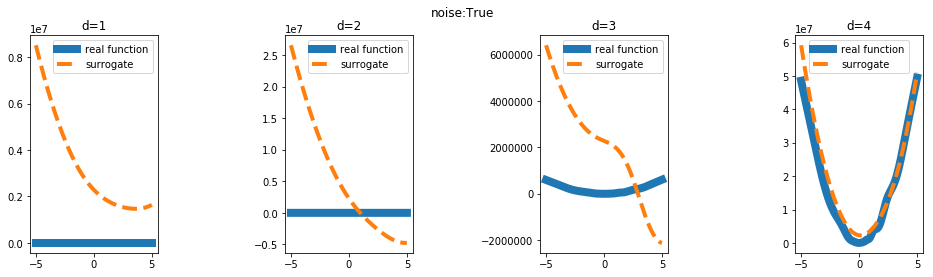

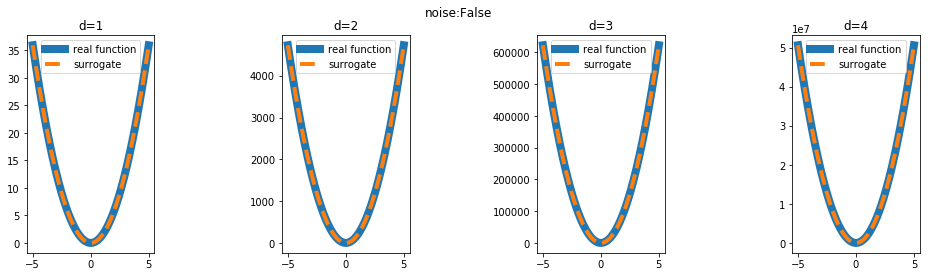

In [37]:
RMSE, noiseRMSE=Analyse(dim=4, LCN=6,Trace=True)



As we can see the augmented RBF fails in providing a reasonable model for F10 if accompanied with a deterministic noise, although they can perform very well in absence of the noise.
We can also see that the model can only detect the steepest direction, in this case the foruth dimension. This is why SACOBRA optimizer (using RBFs as surrogates) stagnates very fast after going down the valley of the steepest direction, then there is no chance to move further toward the optimum if the models are useless in most directions.


# Analysing the impact of dimensionality on the quality of model

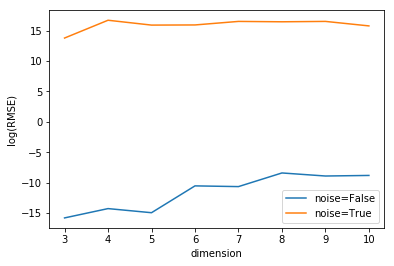

In [38]:
RMSEArray=[]
noiseRMSEArray=[]
DIMS=range(3,11)
for dim in DIMS:
   RMSE, noiseRMSE=Analyse(dim, 6, DOPLOT=False)
   RMSEArray.append(np.log(RMSE))
   noiseRMSEArray.append(np.log(noiseRMSE))


fig = plt.figure()
ax = plt.axes()
ax.plot(DIMS, RMSEArray,label='noise=False');   
ax.plot(DIMS, noiseRMSEArray,label='noise=True');
ax.set_xlabel('dimension')
ax.set_ylabel('log(RMSE)')
ax.legend()


# Analysing the impact of the LCN 

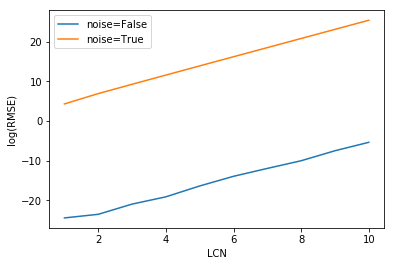

In [39]:
RMSEArray=[]
noiseRMSEArray=[]
LCNS=range(1,11)
for LCN in LCNS:
   RMSE, noiseRMSE=Analyse(4, LCN, DOPLOT=False)
   RMSEArray.append(np.log(RMSE))
   noiseRMSEArray.append(np.log(noiseRMSE))


fig = plt.figure()
ax = plt.axes()
ax.plot(LCNS, RMSEArray,label='noise=False');   
ax.plot(LCNS, noiseRMSEArray,label='noise=True');   
ax.set_xlabel('LCN')
ax.set_ylabel('log(RMSE)')
ax.legend()

# Heatmap plot for the impact of dimension and LCN on RMSE

In [0]:
DIMS=np.arange(3,11).astype(int)
LCNS=np.arange(1,11).astype(int)
VAnalyse = np.vectorize(Analyse)
RMSEMat=np.empty((0,DIMS.shape[0]))
noiseRMSEMat=np.empty((0,DIMS.shape[0]))


for LCN in LCNS:
  RMSE, noiseRMSE=VAnalyse(DIMS,LCN=LCN, DOPLOT=False)
  RMSEMat=np.append(RMSEMat,RMSE.reshape(1,DIMS.shape[0]),axis=0)
  noiseRMSEMat=np.append(noiseRMSEMat,noiseRMSE.reshape(1,DIMS.shape[0]),axis=0)



fig, axs = plt.subplots(1,2, facecolor='w', edgecolor='k',figsize=(16, 4))
fig.subplots_adjust(hspace = 5, wspace=1)
ax1, ax2 = axs
fig.suptitle('$log_{10}$(rmse) for the F10')

im1=ax1.imshow(np.log(RMSEMat),cmap='hot_r')
cbar=fig.colorbar(im1, ax=ax1)
cbar.ax.invert_yaxis()
cbar.update_ticks()
cbar.set_ticks(np.arange(np.min(np.log(RMSEMat)),np.max(np.log(RMSEMat)),5))
ax1.set_title('noise=False', fontsize=12)
ax1.set_xlabel('Dimension')
ax1.set_ylabel('LCN')
#ax1.show()

im2=ax2.imshow(np.log(noiseRMSEMat),cmap='hot_r')
cbar=fig.colorbar(im2, ax=ax2)
cbar.ax.invert_yaxis()
cbar.update_ticks()
cbar.set_ticks(np.arange(np.min(np.log(noiseRMSEMat)),np.max(np.log(noiseRMSEMat)),5))
ax2.set_title('noise=True', fontsize=12)
ax2.set_xlabel('Dimension')
ax2.set_ylabel('LCN')
#axs[1].show()